In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas pyodbc

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyodbc
import pandas as pd

# Set up connection
conn = pyodbc.connect(
    "Driver={SQL Server};"
    "Server=ANNAPOORANI;"
    "Database=heightweight;"
    "Trusted_Connection=yes;"
)

# Write your SQL query
query = "SELECT TOP 1000* FROM [dbo].[Height_Weight]"

# Read into DataFrame
df = pd.read_sql(query, conn)

# Preview the data
print(df.head())

   Index   Height_cm  Weight_kg
0      1  167.089615  51.252495
1      2  181.648636  61.909546
2      3  176.272797  69.411781
3      4  173.270157  64.562202
4      5  172.181030  65.452011


C:\Users\annap\AppData\Local\Temp\ipykernel_10260\3507422538.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as me

In [5]:
df.head(10)

,Index,Height_cm,Weight_kg
0,1,167.089615,51.252495
1,2,181.648636,61.909546
2,3,176.272797,69.411781
3,4,173.270157,64.562202
4,5,172.181030,65.452011
5,6,174.492508,55.928982
6,7,177.297180,64.180862
7,8,177.837387,61.898209
8,9,172.472733,50.971176
9,10,169.627197,54.733677


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      1000 non-null   int64  
 1   Height_cm  1000 non-null   float64
 2   Weight_kg  1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
df.isnull().sum()

Index        0
Height_cm    0
Weight_kg    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['Index', 'Height_cm', 'Weight_kg'], dtype='object')

In [10]:
x=df[['Height_cm']]
y=df['Weight_kg']
print(x.shape,y.shape)

(1000, 1) (1000,)


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(800, 1)

(800,)

(200, 1)

(200,)

In [12]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [13]:
predict=model.predict(x_test)
print(predict[:10])

[62.47739719 60.31312175 59.90467577 60.75230861 59.41784215 55.06955827
 54.49266295 59.44132026 53.86007008 51.89273454]


In [14]:
error=me(predict,y_test)
error

20.815095808396567

In [15]:
import pickle

pickle.dump(model,open('linregpredict.pkl','wb'))

In [16]:
Height_cm=int(input("Enter your height:"))

p=pickle.load(open('linregpredict.pkl','rb'))
p.predict([[Height_cm]])

c:\Users\annap\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61.599649])

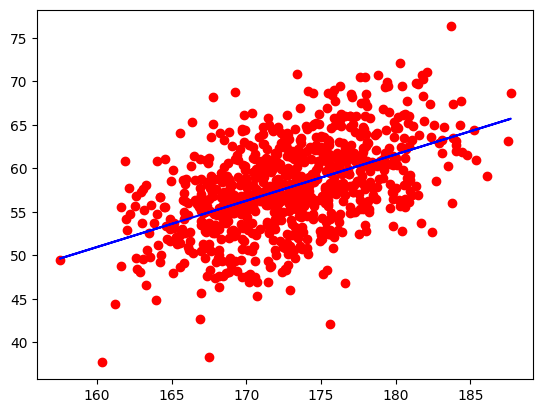

In [17]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.show()